In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
XXSMALL_SIZE = 8
XSMALL_SIZE = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [4]:
def get_count_df(path):
    df = pd.read_csv(path, sep = "\t", header = None)
    df[['name', 'e', 's']] = df[2].str.split('_',expand=True)
    df.drop([2, "name"], axis = 1, inplace = True)
    df.columns = ["er", "count", "time", "s"]
    df["s"] = df["s"].str.split(".", expand = True)[0]
    df["s"] = df["s"].str.removeprefix("s")
    df["time"] = df["time"].str.removeprefix("e")
    df = df.astype("float64")
    return df    

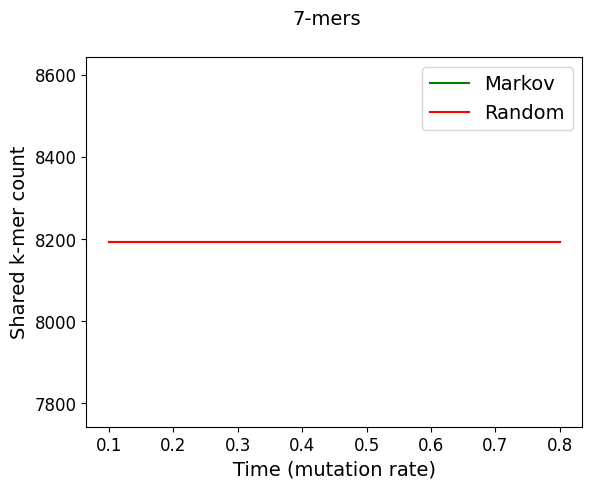

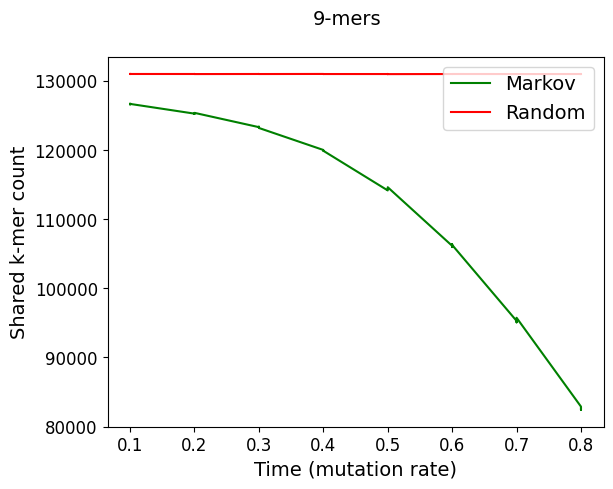

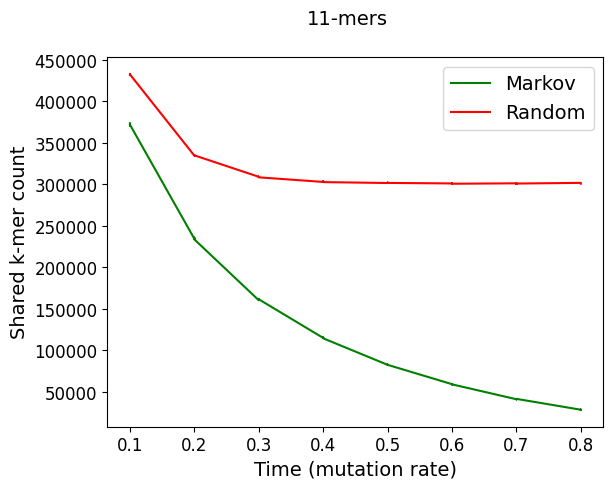

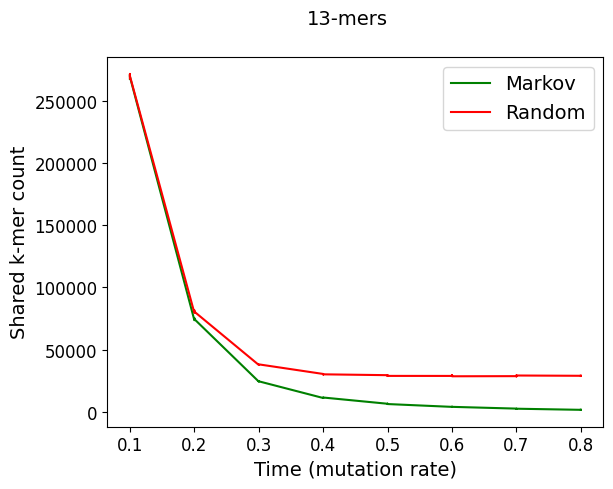

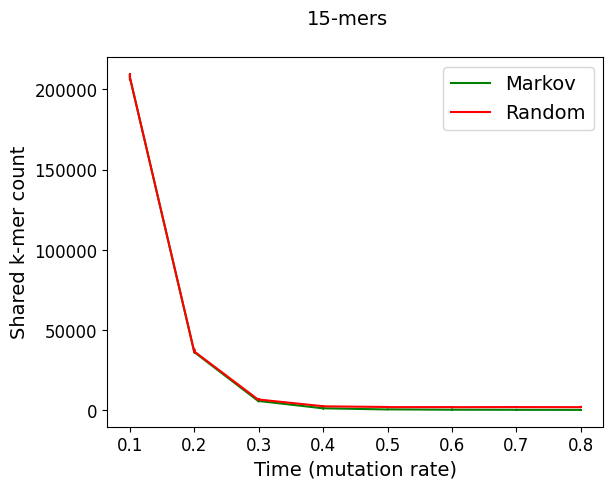

In [12]:
for k in [7, 9, 11, 13, 15]:
    markov = get_count_df("data/k" + str(k) + "/markov.shared.counts")
    mason = get_count_df("data/k" + str(k) + "/mason.shared.counts")

    fig, ax1 = plt.subplots()
    fig.suptitle(str(k) + "-mers")
    #ax2 = ax1.twinx()
    #ax2.plot(markov["time"], markov["er"], 'b-')

    ax1.plot(markov["time"], markov["count"], 'g-', label = "Markov")
    ax1.plot(mason["time"], mason["count"], 'r-', label = "Random")
    ax1.legend(loc = "upper right")

    
    ax1.set_xlabel('Time (mutation rate)')
    ax1.set_ylabel('Shared k-mer count',) 
                   #color='g')
    ax2.set_ylabel('Edit distance', color='b')

    plt.show()